## Image classification on fashion_mnnist datasets of Keras

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

### Loading the Data from keras datasets

In [26]:
from keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

### Visualizing the Data

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
print(" X_train: {} images".format(X_train.shape[0]) + "\n", 
     "y_train: {} images".format(y_train.shape[0]) + "\n",
     "X_test: {} images".format(X_test.shape[0]) + "\n",
     "y_test: {} images".format(y_test.shape[0]) + "\n")

 X_train: 60000 images
 y_train: 60000 images
 X_test: 10000 images
 y_test: 10000 images



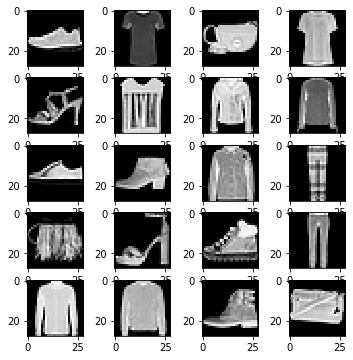

In [29]:
# plot 20 random images from the our dataset in grayscale

w=10
h=10
fig=plt.figure(figsize=(6, 6))
columns = 4
rows = 5

for i in range(1, columns*rows +1):
    rand = np.random.randint(60000)
    fig.add_subplot(rows, columns, i)
    plt.imshow(X_train[rand], cmap="gray")
plt.show()

### Preprocessing the Data



In [30]:
X_train.max()

255

In [31]:
# Normalize the X train and X test data by dividing by the max value of the image arrays.

X_train = X_train/255
X_test = X_test/255

In [32]:
# Reshape the X arrays to include a 4 dimension of the single channel

X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)

In [36]:
print(X_train.shape, "\n",X_test.shape)

(60000, 28, 28, 1) 
 (10000, 28, 28, 1)


In [37]:
# Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras#
from keras.utils.np_utils import to_categorical
y_cat_test = to_categorical(y_test,10) 
y_cat_train = to_categorical(y_train,10)

### Building the Model

In [45]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D,Flatten

model= Sequential()

In [46]:
# Create convolutional neural network for my model

model.add(Conv2D(filters = 32, kernel_size=(4,4),input_shape=(28,28,1),activation="relu"))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation="relu"))

model.add(Dense(10, activation="softmax"))

model.compile(loss = "categorical_crossentropy",
             optimizer="rmsprop",
             metrics=["accuracy"])

In [48]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


### Training and save the Model

In [50]:
# Train/Fit the model to the x_train set with 10 epochs
model.fit(X_train,y_cat_train,epochs=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 43s 709us/step - loss: 0.3985 - acc: 0.8575
Epoch 2/10
60000/60000 [==============================] - 42s 707us/step - loss: 0.2744 - acc: 0.9015
Epoch 3/10
60000/60000 [==============================] - 37s 613us/step - loss: 0.2373 - acc: 0.91381s - loss:
Epoch 4/10
60000/60000 [==============================] - 37s 621us/step - loss: 0.2139 - acc: 0.9236
Epoch 5/10
60000/60000 [==============================] - 38s 625us/step - loss: 0.1953 - acc: 0.9304
Epoch 6/10
60000/60000 [==============================] - 42s 693us/step - loss: 0.1815 - acc: 0.9361
Epoch 7/10
60000/60000 [==============================] - 44s 736us/step - loss: 0.1692 - acc: 0.9402
Epoch 8/10
60000/60000 [==============================] - 37s 615us/step - loss: 0.1592 - acc: 0.9436
Epoch 9/10
60000/60000 [==============================] - 39s 645us/step - loss: 0.1503 - acc: 0.9476
Epoch 10/10
60000/60000 

In [54]:
model.save("fashion_mnist.h5")

### Evaluating the Model

In [51]:
model.metrics_names
model.evaluate(X_test,y_cat_test)

10000/10000 [==============================] - 1s 129us/step


[0.32229075247347355, 0.9079]

In [52]:
from sklearn.metrics import classification_report

predictions = model.predict_classes(X_test)

In [53]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1000
           1       0.99      0.98      0.98      1000
           2       0.81      0.90      0.85      1000
           3       0.91      0.91      0.91      1000
           4       0.84      0.85      0.85      1000
           5       0.98      0.98      0.98      1000
           6       0.81      0.65      0.72      1000
           7       0.96      0.97      0.97      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.97      0.97      1000

   micro avg       0.91      0.91      0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [133]:
def show_resut(img):
    classification =["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
    img = img.reshape(1,28,28,1)
    prediction_array = np.round(model.predict(img),0)
    
    count = [i for i, j in enumerate(prediction_array[0]) if j == max(prediction_array[0])]
    
    return classification[count[0]]

Pullover


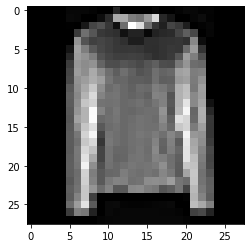

In [146]:
# Test with single random image

rand = np.random.randint(10000)
img = X_test[rand]
print(show_resut(img))
img=img.reshape(28,28)
plt.imshow(img,cmap="gray")


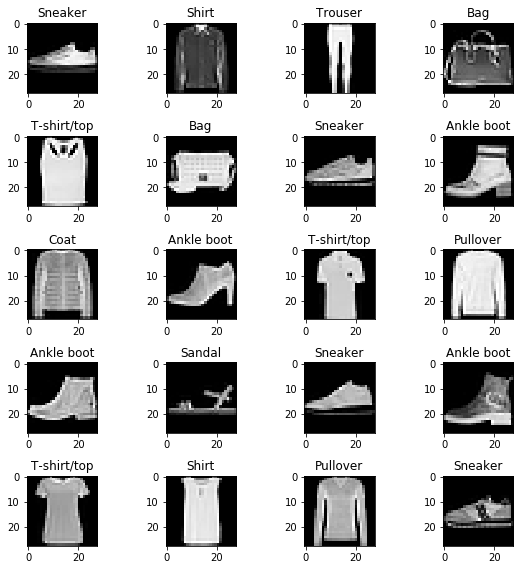

In [145]:
# plot 20 random images from the our dataset in grayscale and give prediction

w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
fig_list= []

for i in range(1, columns*rows +1):
    rand = np.random.randint(10000)
    fig_list.append(fig.add_subplot(rows, columns, i))
    fig_list[-1].set_title(show_resut(X_test[rand]))
    plt.imshow(X_test[rand].reshape(28,28), cmap="gray")
    
plt.tight_layout(True)   
plt.show()

## The End!